# Exploratory Data Analysis (EDA) - Pre Pre-Processing

### **0. Importing the libraries**

In [136]:
import numpy as np
import pandas as pd
from datetime import datetime # to get the current datetime

import matplotlib.pyplot as plt # to make plots (histograms, etc...)
import seaborn as sns
import plotly.express as px

import ast # transform the strings into a list

In [137]:
pd.set_option('display.max_colwidth', None)

### **1. Initial Data Understanding**

#### 1.0) Load the datasets

In [ ]:
customer_basket = pd.read_csv('../data/raw/customer_basket.csv')
customer_info = pd.read_csv('customer_info.csv', index_col=["customer_id"])

customer_info = customer_info.drop("Unnamed: 0", axis='columns')

#### 1.1) Print shapes, column names, sample rows

In [139]:
print(f"The customer basket dataset has {customer_basket.shape[0]} rows and {customer_basket.shape[1]} columns.")
print(f"The customer info dataset has {customer_info.shape[0]} rows and {customer_info.shape[1]} columns.")

The customer basket dataset has 100000 rows and 3 columns.
The customer info dataset has 34060 rows and 24 columns.


In [140]:
customer_info.head(5)

customer_name customer_gender   customer_birthdate  \
customer_id                                                           
29930              April Clark          female  01/15/1972 02:27 PM   
6813         Bsc. Paul Ketchum            male  07/31/1944 10:53 AM   
39451             Mary Downing          female  11/13/1989 02:11 PM   
21557             Manuel Kueny            male  08/09/1976 06:23 AM   
16415        Phd. Curtis Tharp            male  07/11/1966 08:12 AM   

             kids_home  teens_home  number_complaints  \
customer_id                                             
29930              2.0         2.0                1.0   
6813               0.0         1.0                0.0   
39451              2.0         3.0                0.0   
21557              0.0         0.0                1.0   
16415              1.0         1.0                1.0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
29930                            4.0                    7789.0   
6813                             4.0                    8653.0   
39451                            7.0                   15605.0   
21557                            1.0                   13440.0   
16415                            5.0                   49250.0   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
29930                            5601.0          13.0  ...   
6813                               35.0          14.0  ...   
39451                            4275.0          14.0  ...   
21557                           16366.0          14.0  ...   
16415                            3197.0          14.0  ...   

             lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                
29930                     1894.0                   457.0   
6813                       346.0                   394.0   
39451                     1971.0                   920.0   
21557                      785.0                   139.0   
16415                     1492.0                  1046.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                                      
29930                            412.0                   428.0   
6813                              75.0                   226.0   
39451                            335.0                   192.0   
21557                            679.0                   270.0   
16415                            112.0                   144.0   

             lifetime_total_distinct_products  \
customer_id                                     
29930                                   386.0   
6813                                     73.0   
39451                                   319.0   
21557                                   221.0   
16415                                   244.0   

             percentage_of_products_bought_promotion  year_first_transaction  \
customer_id                                                                    
29930                                       0.158741                  2018.0   
6813                                        1.227890                  2013.0   
39451                                       0.101598                  2011.0   
21557                                       0.259943                  2009.0   
16415                                       0.317822                  2012.0   

             loyalty_card_number   latitude  longitude  
customer_id                                             
29930                        NaN  38.721807  -9.125534  
6813                    971840.0  38.734668  -9.163533  
39451                        NaN  38.787126  -9.147077  
21557                        NaN  38.741816  -9.159700  
16415                   925367.0  38.785921  -9.149221  

[5 rows x 24 columns]

In [141]:
customer_basket.head(5)

invoice_id  \
0     5062209   
1     4272512   
2     7121052   
3     5847748   
4     6336114   

                                                                                                                                                                                            list_of_goods  \
0  ['megaman zero 3', 'energy bar', 'pokemon violet', 'airpods', 'fresh bread', 'pancakes', 'brownies', 'energy drink', 'champagne', 'red wine', 'bluetooth headphones', 'protein bar', 'metroid fusion']   
1                     ['black beer', 'bramble', 'laptop', 'pokemon violet', 'airpods', 'gadget for tiktok streaming', 'ring light', 'ratchet & clank', 'pancakes', 'energy drink', 'gums', 'protein bar']   
2                                                          ['soup', 'shallot', 'cake', 'fresh bread', 'cream', 'carrots', 'babies food', 'ham', 'cookies', 'salad', 'tomato sauce', 'cooking oil', 'tea']   
3                                                   ['soup', 'cooking oil', 'cereals', 'oil', 'dog food', 'deodorant', 'tomatoes', 'yogurt cake', 'pet food', 'salmon', 'olive oil', 'fresh tuna', 'tea']   
4                          ['eggplant', 'mint green tea', 'oil', 'bacon', 'toilet paper', 'shrimp', 'brownies', 'pancakes', 'champagne', 'spinach', 'cologne', 'chicken', 'barbecue sauce', 'fresh tuna']   

   customer_id  
0         4925  
1        19046  
2        10318  
3        27283  
4        16072

In [ ]:
customer_basket["invoice_id"].is_unique

In [196]:
customer_basket["customer_id"].is_unique

False

**For the preprocessing**:Thus, we have duplicate rows

In [143]:
customer_basket[customer_basket["invoice_id"].duplicated(keep=False)]

invoice_id  \
365      10756514   
366      10756514   
485       9407916   
486       9407916   
631       9863418   
...           ...   
91494     4124129   
91875     2280114   
91876     2280114   
92337    10587899   
92338    10587899   

                                                                                                                                                                                  list_of_goods  \
365                                                                                         ['candy bars', 'cake', 'french fries', 'oil', 'parmesan cheese', 'pasta', 'cookies', 'cooking oil']   
366                                                                                         ['candy bars', 'cake', 'french fries', 'oil', 'parmesan cheese', 'pasta', 'cookies', 'cooking oil']   
485                                          ['light cream', 'cottage cheese', 'laptop', 'frozen smoothie', 'french fries', 'flax seed', 'strawberries', 'champagne', 'escalope', 'fresh tuna']   
486                                          ['light cream', 'cottage cheese', 'laptop', 'frozen smoothie', 'french fries', 'flax seed', 'strawberries', 'champagne', 'escalope', 'fresh tuna']   
631                                                                                                                              ['energy drink', 'blueberries', 'green beans', 'iMac', 'mint']   
...                                                                                                                                                                                         ...   
91494                                                                                                                 ['cider', 'dessert wine', 'white wine', 'half-life: alyx', 'french wine']   
91875                                                                                   ['candy bars', 'soup', 'cake', 'oil', 'fresh bread', 'cream', 'babies food', 'pet food', 'cooking oil']   
91876                                                                                   ['candy bars', 'soup', 'cake', 'oil', 'fresh bread', 'cream', 'babies food', 'pet food', 'cooking oil']   
92337  ['whole wheat rice', 'cotton buds', 'bacon', 'final fantasy XX', 'oil', 'milk', 'champagne', 'babies food', 'pet food', 'ratchet & clank 3', 'eggs', 'ratchet & clank 2', 'cauliflower']   
92338  ['whole wheat rice', 'cotton buds', 'bacon', 'final fantasy XX', 'oil', 'milk', 'champagne', 'babies food', 'pet food', 'ratchet & clank 3', 'eggs', 'ratchet & clank 2', 'cauliflower']   

       customer_id  
365          15253  
366          33632  
485           3717  
486           8167  
631          33535  
...            ...  
91494        30163  
91875         5966  
91876        30813  
92337         6652  
92338        15035  

[743 rows x 3 columns]

**For the preprocessing**: Regarding the customer_basket dataset, when the same items are bought in two different instances, these are attributed different invoices. Thus we cannot make invoice_id our index column

#### 1.2) Check basic dtypes and missing values

For the customer_info dataset:

In [144]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34060 entries, 29930 to 22050
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_name                            34060 non-null  object 
 1   customer_gender                          34060 non-null  object 
 2   customer_birthdate                       33719 non-null  object 
 3   kids_home                                33311 non-null  float64
 4   teens_home                               33277 non-null  float64
 5   number_complaints                        33038 non-null  float64
 6   distinct_stores_visited                  33379 non-null  float64
 7   lifetime_spend_groceries                 34060 non-null  float64
 8   lifetime_spend_electronics               34060 non-null  float64
 9   typical_hour                             32698 non-null  float64
 10  lifetime_spend_vegetables                33038 

In [145]:
missing_customer_info = pd.DataFrame({
    'Missing Count': customer_info.isnull().sum(),
    'Missing %': round(customer_info.isnull().mean() * 100, 2)
})

In [146]:
missing_customer_info

Missing Count  Missing %
customer_name                                        0       0.00
customer_gender                                      0       0.00
customer_birthdate                                 341       1.00
kids_home                                          749       2.20
teens_home                                         783       2.30
number_complaints                                 1022       3.00
distinct_stores_visited                            681       2.00
lifetime_spend_groceries                             0       0.00
lifetime_spend_electronics                           0       0.00
typical_hour                                      1362       4.00
lifetime_spend_vegetables                         1022       3.00
lifetime_spend_nonalcohol_drinks                     0       0.00
lifetime_spend_alcohol_drinks                      681       2.00
lifetime_spend_meat                                  0       0.00
lifetime_spend_fish                               1703       5.00
lifetime_spend_hygiene                               0       0.00
lifetime_spend_videogames                            0       0.00
lifetime_spend_petfood                               0       0.00
lifetime_total_distinct_products                     0       0.00
percentage_of_products_bought_promotion              0       0.00
year_first_transaction                               0       0.00
loyalty_card_number                              10908      32.03
latitude                                             0       0.00
longitude                                            0       0.00

**For the preprocessing**: 32% of customers have a missing value at loyalty_card_number, meaning they probably don't have one.

For the customer_basket dataset:

In [147]:
customer_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   invoice_id     100000 non-null  int64 
 1   list_of_goods  100000 non-null  object
 2   customer_id    100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [148]:
missing_customer_basket = pd.DataFrame({
    'Missing Count': customer_basket.isnull().sum(),
    'Missing %': round(customer_basket.isnull().mean() * 100, 2)
})

In [149]:
missing_customer_basket

Missing Count  Missing %
invoice_id                 0        0.0
list_of_goods              0        0.0
customer_id                0        0.0

### **2. Univariate Exploration**

#### 2.0) Creating an "Age" variable

##### 2.0.1) Altering the customer_birthdate column to datetime format

In [150]:
customer_info["customer_birthdate"] = pd.to_datetime(customer_info["customer_birthdate"], format="%m/%d/%Y %I:%M %p")

##### 2.0.2) Creating the Age column throught the differece between the current date and the birth date

In [151]:
today = datetime.now()
customer_info["age"] = customer_info["customer_birthdate"].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day))) # works because True = 1 and False = 0

#### 2.1) Histograms of numerical variables

##### 2.1.1) customer_info dataset

In [152]:
numerical_customer_info = customer_info.select_dtypes(include='number')

In [153]:
# Create a function to make a histogram of every single variable

def histogramer(dataset, feature, bins=10):
    # fazer bins para valores unicos
    # criar o parametro opcional "bins" (default é 20)
    # fazer a docstring
    """
    """
    if bins == "unique":
        unique_values = dataset[feature].nunique()
        bins = unique_values
    
    sns.histplot(dataset[feature], bins=bins, kde=True, edgecolor='black')
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    

kids_home


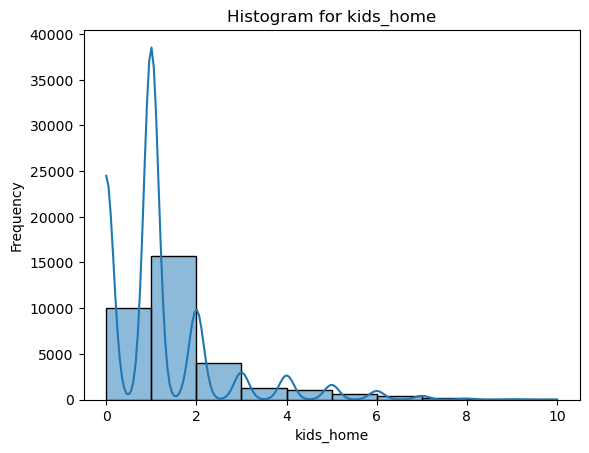

teens_home


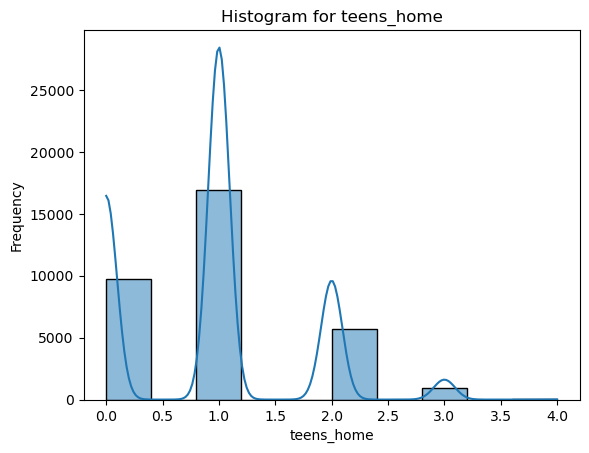

number_complaints


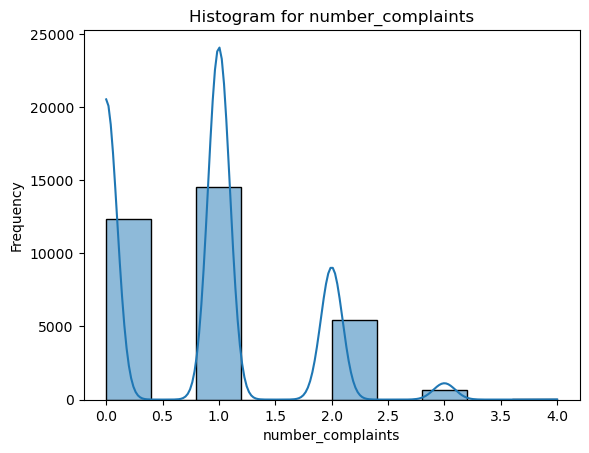

distinct_stores_visited


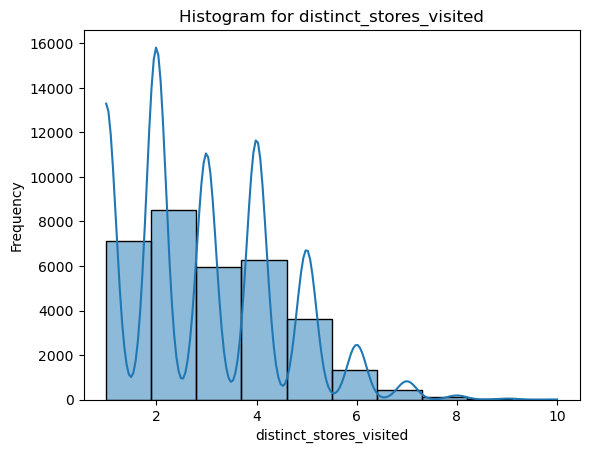

lifetime_spend_groceries


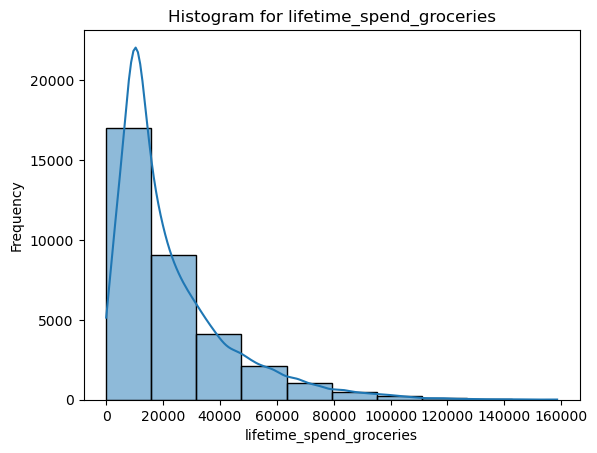

lifetime_spend_electronics


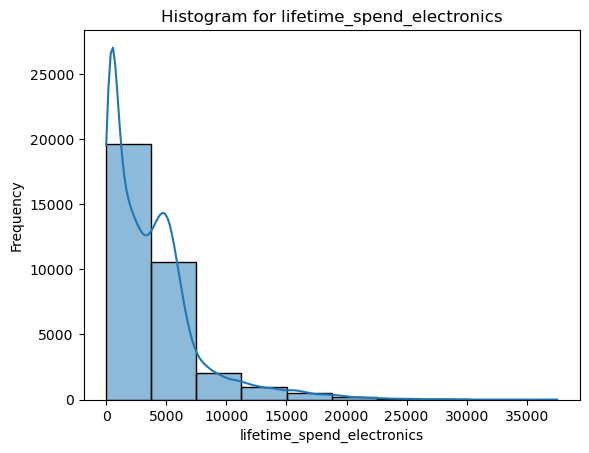

typical_hour


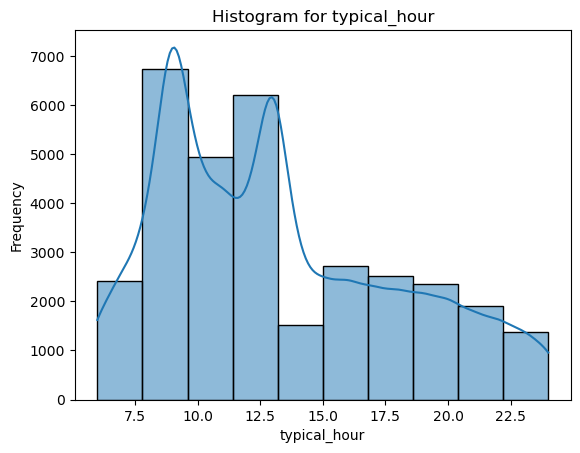

lifetime_spend_vegetables


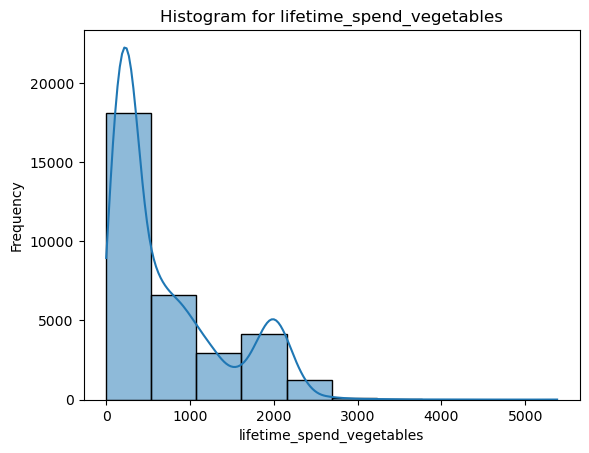

lifetime_spend_nonalcohol_drinks


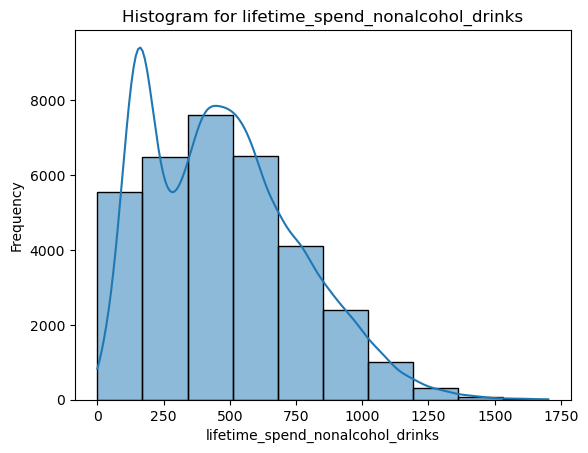

lifetime_spend_alcohol_drinks


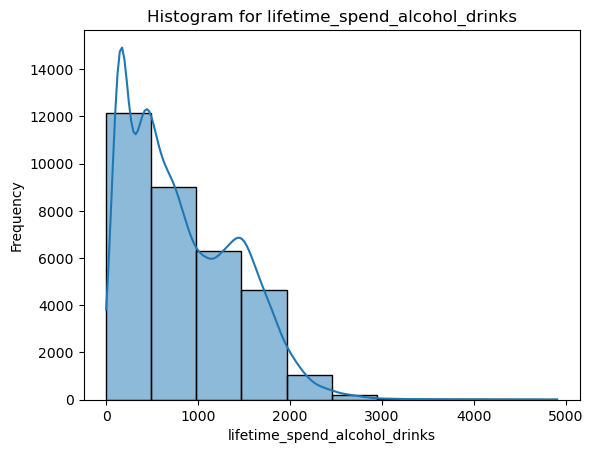

lifetime_spend_meat


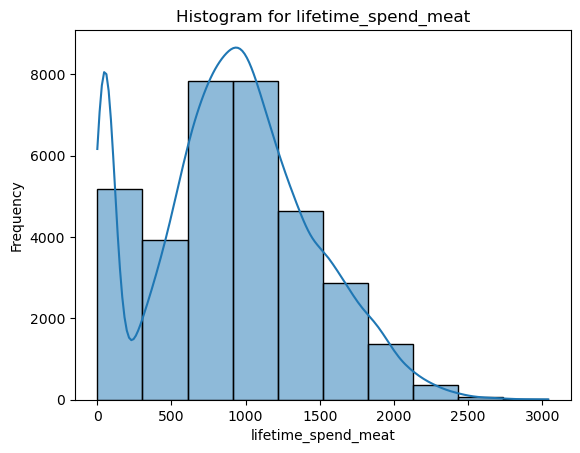

lifetime_spend_fish


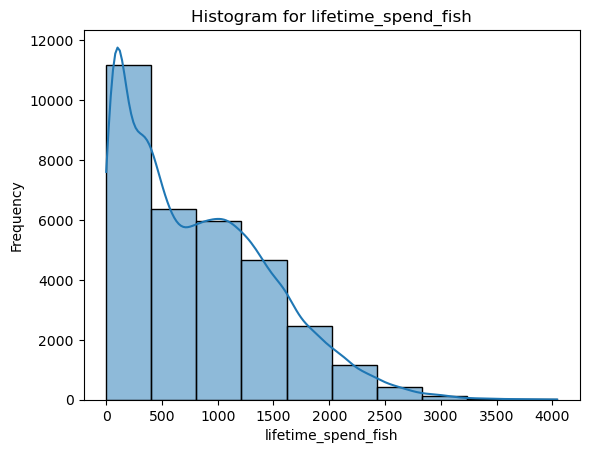

lifetime_spend_hygiene


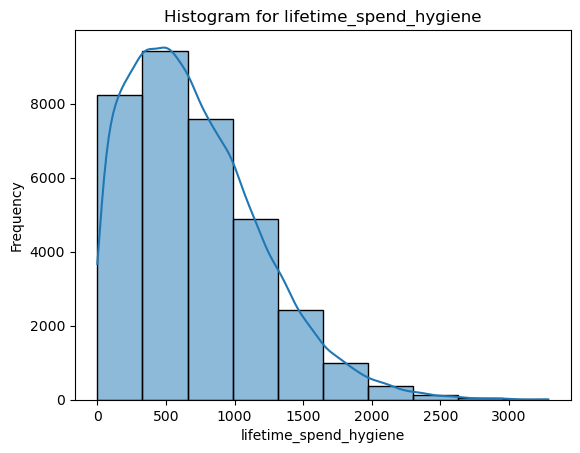

lifetime_spend_videogames


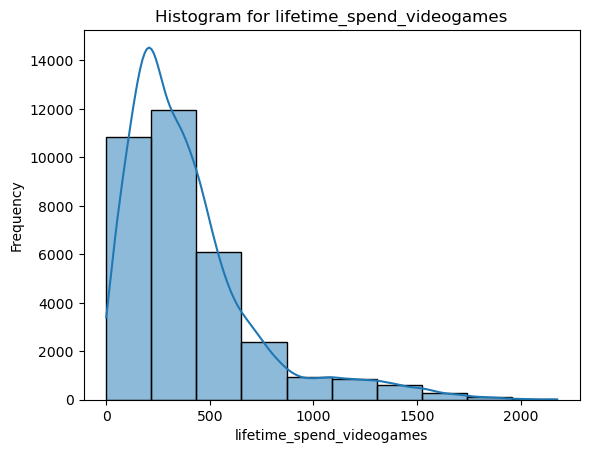

lifetime_spend_petfood


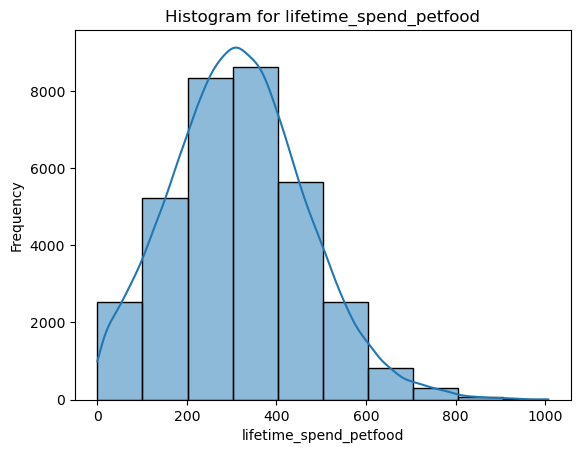

lifetime_total_distinct_products


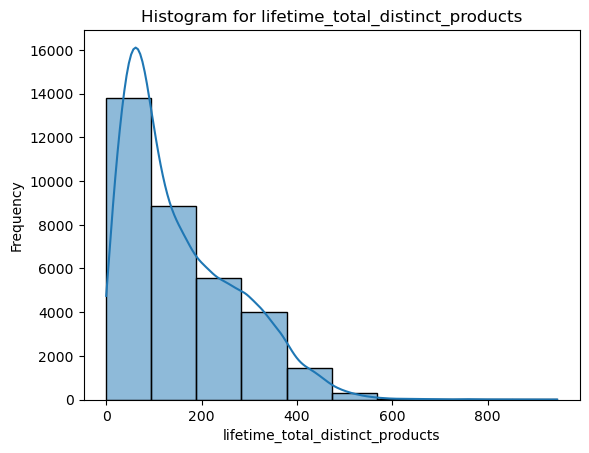

percentage_of_products_bought_promotion


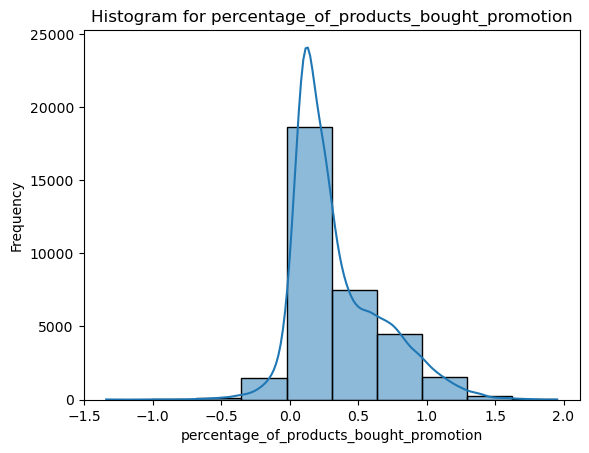

year_first_transaction


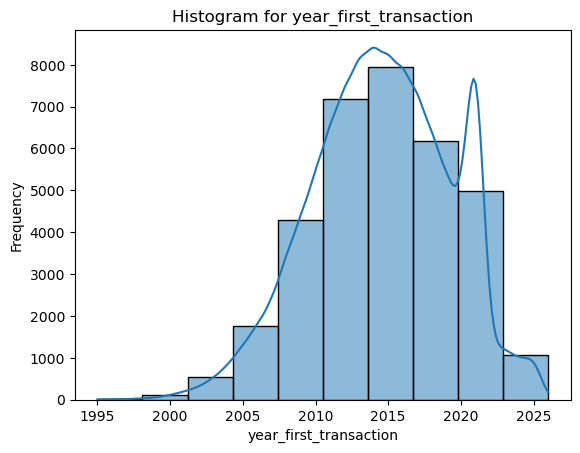

loyalty_card_number


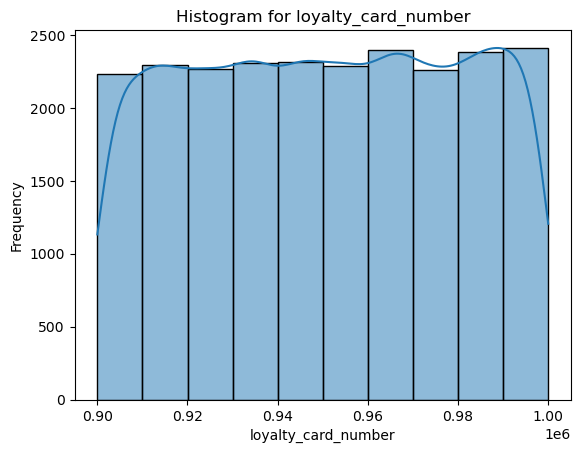

latitude


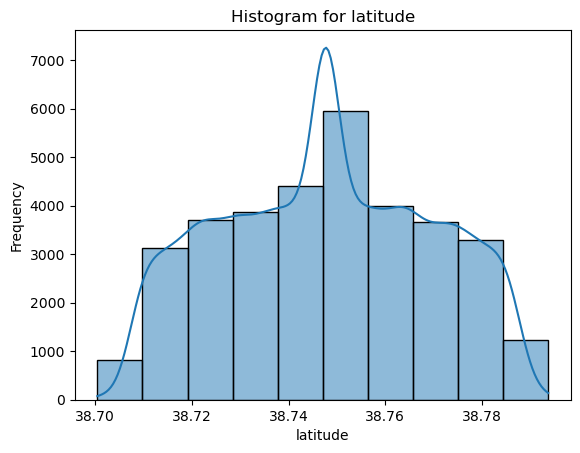

longitude


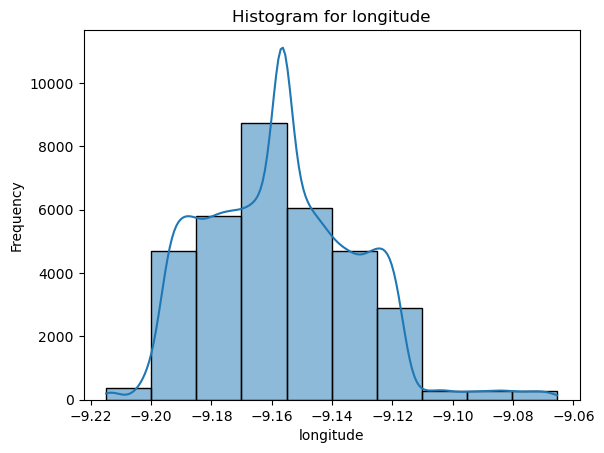

age


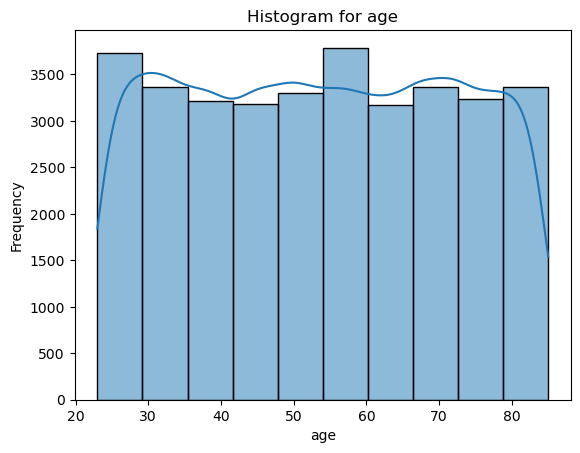

In [ ]:
for feature in numerical_customer_info:
    print(feature)
    histogramer(numerical_customer_info, feature)

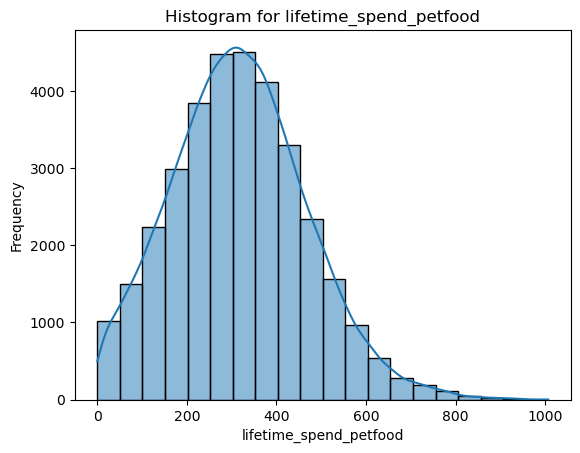

In [155]:
histogramer(customer_info, "lifetime_spend_petfood", bins=20)

##### 2.1.2) customer_basket dataset

In [156]:
type(customer_basket["list_of_goods"][0])

str

the list_of_goods column is all in **string** format, we first have to turn it into **lists**

In [157]:
customer_basket["list_of_goods"] = customer_basket["list_of_goods"].apply(ast.literal_eval)

In [158]:
type(customer_basket["list_of_goods"][0])

list

now we create a function that returns a sorted (using merge sort) dictionary of the most purchased items

In [159]:
def merge_sort_by_value(items):
    if len(items) <= 1:
        return items

    mid = len(items) // 2
    left = merge_sort_by_value(items[:mid])
    right = merge_sort_by_value(items[mid:])

    return merge_by_value(left, right)

def merge_by_value(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i][1] >= right[j][1]: 
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])
    return result

def sort_dict_by_value(d):
    items = list(d.items())
    sorted_items = merge_sort_by_value(items)
    return dict(sorted_items)

In [160]:
def purchase_counter(series_of_lt):

    unsorted_dic = {}
    for lt in series_of_lt:
        for item in lt:
            if item not in unsorted_dic.keys():
                unsorted_dic[item] = 1
            else:
                unsorted_dic[item] += 1

    sorted_dic = sort_dict_by_value(unsorted_dic)
    return sorted_dic

In [161]:
# funçao para fazer histograma tp top 10, top 30, do 50 ao 60, etc...

now we make a function that'll return a histogram with the values of a provided range of items (ex: top 10 most bought; from 20th to 50th most bought; etc...)

In [162]:
def histogram_top(dic, nfrom=0, nto=10):

    # convert the dictionary into a dataframe and slicing it (the dictionary)
    items = list(dic.items())[nfrom:nto]
    temp_df = pd.DataFrame([dict(items)]).T.reset_index()
    temp_df.columns = ['product', 'count']

    # plotting the histogram
    sns.barplot(x='product', y='count', data=temp_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top Product Counts')
    plt.tight_layout()
    plt.show()

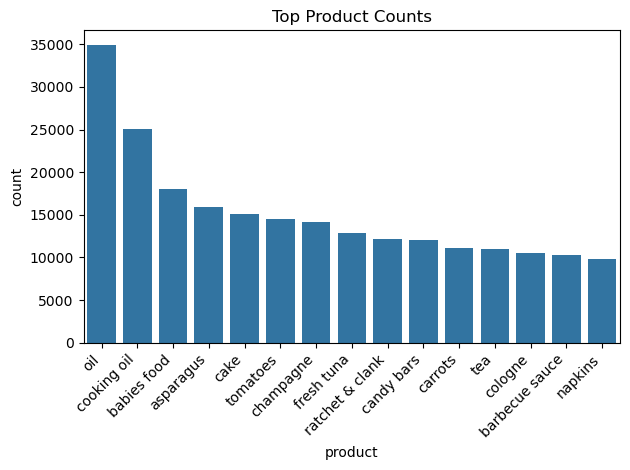

In [199]:
histogram_top(purchase_counter(customer_basket["list_of_goods"]), 0, 15)

#### 2.2) Boxplots to check for outliers

In [200]:
# Create a function to make a boxplot of every single variable

def boxplotter(dataset, feature):
    # fazer a docstring
    """
    """
    px.box(data_frame=dataset, x=feature, title=f'Boxplot for {feature}').show()
    

In [201]:
for feature in numerical_customer_info:
    boxplotter(numerical_customer_info, feature)

**For the preprocessing**: percentage_of_products_bought_promotion is a percentage, yet has negative values

#### 2.3) Notes for the preprocessing

- We have duplicate rows on customer_basket

- Regarding the customer_basket dataset, when the same items are bought in two different instances, these are attributed different invoices. Thus we cannot make invoice_id our index column

- 32% of customers have a missing value at loyalty_card_number, meaning they probably don't have one.

- percentage_of_products_bought_promotion is a percentage, yet has negative values

### **3. Multivariate Exploration**

#### 3.1) Correlation Heatmap for numeric variables

In [173]:
numerical_customer_info

kids_home  teens_home  number_complaints  \
customer_id                                             
29930              2.0         2.0                1.0   
6813               0.0         1.0                0.0   
39451              2.0         3.0                0.0   
21557              0.0         0.0                1.0   
16415              1.0         1.0                1.0   
...                ...         ...                ...   
37071              1.0         1.0                0.0   
27422              1.0         1.0                0.0   
39540              1.0         0.0                1.0   
18367              1.0         1.0                1.0   
22050              2.0         1.0                2.0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
29930                            4.0                    7789.0   
6813                             4.0                    8653.0   
39451                            7.0                   15605.0   
21557                            1.0                   13440.0   
16415                            5.0                   49250.0   
...                              ...                       ...   
37071                            2.0                   62321.0   
27422                            3.0                   16084.0   
39540                            2.0                   14631.0   
18367                            4.0                   37420.0   
22050                            1.0                    8208.0   

             lifetime_spend_electronics  typical_hour  \
customer_id                                             
29930                            5601.0          13.0   
6813                               35.0          14.0   
39451                            4275.0          14.0   
21557                           16366.0          14.0   
16415                            3197.0          14.0   
...                                 ...           ...   
37071                            5250.0          16.0   
27422                            3796.0          13.0   
39540                            8784.0          17.0   
18367                            4702.0           9.0   
22050                              38.0           8.0   

             lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
customer_id                                                                
29930                            726.0                             962.0   
6813                             792.0                             102.0   
39451                           1585.0                             980.0   
21557                             28.0                             269.0   
16415                            258.0                             726.0   
...                                ...                               ...   
37071                            813.0                             528.0   
27422                            502.0                             748.0   
39540                            402.0                             262.0   
18367                            195.0                             485.0   
22050                             78.0                              43.0   

             lifetime_spend_alcohol_drinks  ...  lifetime_spend_hygiene  \
customer_id                                 ...                           
29930                               1213.0  ...                   457.0   
6813                                 104.0  ...                   394.0   
39451                               1872.0  ...                   920.0   
21557                               1855.0  ...                   139.0   
16415                                547.0  ...                  1046.0   
...                                    ...  ...                     ...   
37071                               1524.0  ...                  1048.0   
27422 

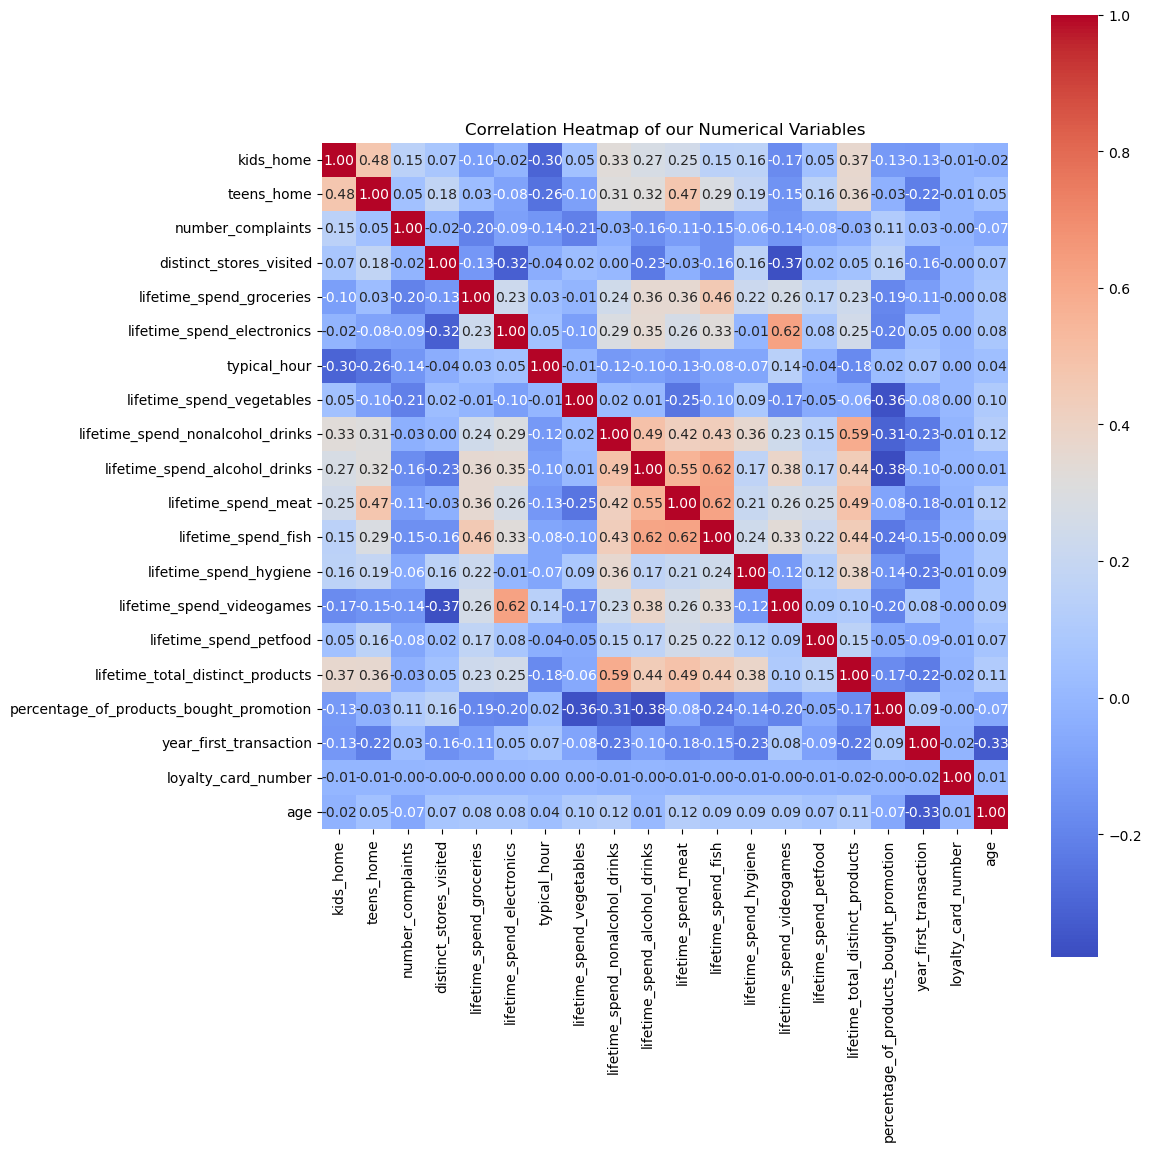

In [195]:
corr_matrix = numerical_customer_info.drop(["latitude","longitude"], axis=1).corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of our Numerical Variables')
plt.tight_layout()
plt.show()

We can observe some relevant (above 0.5) correlations between:
- lifetime_total_distinct_products **and** lifetime_spend_nonalcohol_drinks
- lifetime_spend_videogames **and** lifetime_spend_eletronics
- lifetime_spend_meat **and** lifetime_spend_alcohol_drinks
- lifetime_spend_fish **and** lifetime_spend_alcohol_drinks
- lifetime_spend_fish **and** lifetime_spend_meat

#### 3.2) Scatter plots / Pair plots

### **4. Conclusions for Preprocessing**